Implement a model on the timeseries data that determines the effect of the implementation of parental leave (maternal, paternal, parental) of varying lengths on children's and maternal health characteristics, as described in the data.

In [239]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import acf, pacf, graphics, SARIMAX
import matplotlib.pyplot as plt

In [184]:
# Invert to be long versus wide
time_data = pd.read_csv('../data/selected_data.csv')

time_data.head()

,country_name,country_code,indicator_code,1970,1971,1972,1973,1974,1975,1976,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,PCT.ENG.STM.THR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,73.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SL.TLF.ACTI.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.318001,80.221001,80.132004,79.433998,78.738998,78.047997,77.333000,76.581001,76.582001,76.541000
2,Afghanistan,AFG,SL.TLF.CACT.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77.046997,NaN,77.076797,NaN,NaN,73.163597,NaN,NaN
3,Afghanistan,AFG,SL.TLF.CACT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.401001,78.302002,78.208000,77.535004,76.864998,76.197998,75.483002,74.735001,74.707001,74.657997
4,Afghanistan,AFG,SL.TLF.ACTI.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.469000,15.898000,16.441999,17.424000,18.459999,19.552000,20.704000,21.910000,22.377001,22.566999


In [185]:
column_renames = ['year_' + column for column in time_data.columns[3:]]

new_columns = list(time_data.columns[:3]) + column_renames

time_data.columns = new_columns

In [29]:
time_data.head()

,country_name,country_code,indicator_code,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,Afghanistan,AFG,PCT.ENG.STM.THR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,73.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,SL.TLF.ACTI.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.318001,80.221001,80.132004,79.433998,78.738998,78.047997,77.333000,76.581001,76.582001,76.541000
2,Afghanistan,AFG,SL.TLF.CACT.MA.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77.046997,NaN,77.076797,NaN,NaN,73.163597,NaN,NaN
3,Afghanistan,AFG,SL.TLF.CACT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.401001,78.302002,78.208000,77.535004,76.864998,76.197998,75.483002,74.735001,74.707001,74.657997
4,Afghanistan,AFG,SL.TLF.ACTI.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.469000,15.898000,16.441999,17.424000,18.459999,19.552000,20.704000,21.910000,22.377001,22.566999


In [42]:
time_data.country_code.value_counts()

KOR    290
SLE    149
DOM    149
NGA    149
JOR    149
      ... 
CHL    142
SYC    142
BRN    142
ARE    142
PSE      6
Name: country_code, Length: 211, dtype: int64

In [39]:
time_data.shape

(30625, 53)

In [33]:
time_data.indicator_code.value_counts()

SP.DYN.IMRT.MA.IN       422
SH.IMM.IDPT             422
SH.IMM.MEAS             422
SP.DYN.IMRT.FE.IN       422
SL.EMP.1524.SP.NE.ZS    211
                       ... 
PNC.TWO.DEL              96
CRS.FEB.FIV.ADV          88
PCT.ENG.STM.THR          88
PCT.PUN.FRT              83
PCT.FIV.DEV              75
Name: indicator_code, Length: 145, dtype: int64

In [53]:
duplicates = time_data[time_data.country_code=='KOR']['indicator_code'].duplicated()

In [68]:
time_data[duplicates]

<ipython-input-68-68c8f0aece86>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time_data[duplicates]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [85]:
unique_ind_code = time_data.drop_duplicates(subset='indicator_code')

In [116]:
no_dupes = time_data.drop(columns='country_name').drop_duplicates()

In [121]:
no_korea = no_dupes[no_dupes['country_code'] != 'KOR']

In [131]:
no_korea[no_korea.duplicated(subset=['country_code', 'indicator_code'])]

,country_code,indicator_code,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
23759,SRB,SP.DYN.IMRT.MA.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3,7.1,6.9,6.6,6.3,6.0,5.8,5.5,5.3,5.1
23760,SRB,SP.DYN.IMRT.FE.IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.8,5.7,5.5,5.3,5.1,4.9,4.7,4.5,4.3,4.1


In [134]:
no_korea.drop([23759, 23760], inplace=True)

C:\Users\Danny\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [135]:
temp = pd.wide_to_long(no_korea, stubnames='year_' ,i=['country_code', 'indicator_code'], j='year')

In [167]:
no_nulls = temp.dropna()

SARIMAX

In [169]:
no_nulls.reset_index().set_index('country_code')

,indicator_code,year,year_
country_code,,,
AFG,PCT.ENG.STM.THR,2011,73.100000
AFG,SL.TLF.ACTI.MA.ZS,1990,80.709999
AFG,SL.TLF.ACTI.MA.ZS,1991,80.655998
AFG,SL.TLF.ACTI.MA.ZS,1992,80.571999
AFG,SL.TLF.ACTI.MA.ZS,1993,80.462997
...,...,...,...
ZWE,SN.ITK.VITA.ZS,2013,34.000000
ZWE,SN.ITK.VITA.ZS,2014,32.000000
ZWE,SN.ITK.VITA.ZS,2015,45.000000


In [158]:
no_nulls.index.get_level_values(1)

Index(['PCT.ENG.STM.THR', 'SL.TLF.ACTI.MA.ZS', 'SL.TLF.ACTI.MA.ZS',
       'SL.TLF.ACTI.MA.ZS', 'SL.TLF.ACTI.MA.ZS', 'SL.TLF.ACTI.MA.ZS',
       'SL.TLF.ACTI.MA.ZS', 'SL.TLF.ACTI.MA.ZS', 'SL.TLF.ACTI.MA.ZS',
       'SL.TLF.ACTI.MA.ZS',
       ...
       'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS',
       'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS',
       'SN.ITK.VITA.ZS', 'SN.ITK.VITA.ZS'],
      dtype='object', name='indicator_code', length=588918)

In [165]:
no_nulls.T

country_code               AFG                                          \
indicator_code PCT.ENG.STM.THR SL.TLF.ACTI.MA.ZS                         
year                      2011              1990       1991       1992   
year_                     73.1         80.709999  80.655998  80.571999   

country_code                                                           \
indicator_code                                                          
year                 1993       1994       1995       1996       1997   
year_           80.462997  80.325996  80.156998  80.140999  80.146004   

country_code               ...            ZWE                                \
indicator_code             ... SN.ITK.VITA.ZS                                 
year                 1998  ...           2008  2009  2010  2011  2012  2013   
year_           80.161003  ...            0.0  77.0  49.0  47.0  61.0  34.0   

country_code                            
indicator_code                          
year            2014  2015  2016  2017  
year_           32.0  45.0  35.0  43.0  

[1 rows x 588918 columns]

In [163]:
time_data.set_index('country_code').drop(columns=['country_name']).T

country_code,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,AFG,...,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE,ZWE
indicator_code,PCT.ENG.STM.THR,SL.TLF.ACTI.MA.ZS,SL.TLF.CACT.MA.NE.ZS,SL.TLF.CACT.MA.ZS,SL.TLF.ACTI.FE.ZS,SL.TLF.CACT.FE.NE.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.ADVN.FE.ZS,SL.TLF.ACTI.1524.MA.NE.ZS,SL.TLF.ACTI.1524.FE.NE.ZS,...,SP.DYN.TFRT.IN,SH.IMM.IDPT,SL.TLF.ACTI.1524.FE.ZS,SL.TLF.ACTI.1524.FE.NE.ZS,SL.TLF.ACTI.1524.MA.ZS,SL.TLF.ACTI.1524.MA.NE.ZS,SL.TLF.CACT.FE.ZS,SL.TLF.CACT.FE.NE.ZS,SH.IMM.MEAS,SN.ITK.VITA.ZS
year_1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
features = ['SH.MMR.LEVE.AL', 'SH.PAR.LEVE.AL', 'SH.PTR.LEVE.AL', 'SH.MMR.LEVE', 'SH.MMR.LEVE.GT', 'SH.PAR.LEVE.FE, SH.PAR.LEVE.MA']
#targets = 'SH.STA.MMRT'
#targets = 'SH.MMR.DTHS'
targets = 'SH.FPL.SATI.ZS'

In [233]:
temp_df = time_data[time_data.indicator_code.isin(features+[targets])]

In [234]:
temp_df

,country_name,country_code,indicator_code,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,...,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
26,Afghanistan,AFG,SH.MMR.LEVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0
39,Afghanistan,AFG,SH.FPL.SATI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN,NaN,NaN
75,Afghanistan,AFG,SH.MMR.LEVE.GT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,Afghanistan,AFG,SH.PAR.LEVE.AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,Afghanistan,AFG,SH.PTR.LEVE.AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30497,Zimbabwe,ZWE,SH.PTR.LEVE.AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30527,Zimbabwe,ZWE,SH.PAR.LEVE.AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30531,Zimbabwe,ZWE,SH.MMR.LEVE.GT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30586,Zimbabwe,ZWE,SH.FPL.SATI.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,80.1,NaN,NaN,NaN,86.5,NaN,NaN,NaN,NaN


In [235]:
time_agg = temp_df.drop(columns=['country_name', 'country_code'])

In [236]:
time_agg.indicator_code.value_counts()

SH.FPL.SATI.ZS    211
SH.MMR.LEVE       211
SH.MMR.LEVE.GT    211
SH.PAR.LEVE.AL    211
SH.PTR.LEVE.AL    211
SH.MMR.LEVE.AL    211
Name: indicator_code, dtype: int64

In [240]:
time_agg.groupby('indicator_code').mean().T

indicator_code,SH.FPL.SATI.ZS,SH.MMR.LEVE,SH.MMR.LEVE.AL,SH.MMR.LEVE.GT,SH.PAR.LEVE.AL,SH.PTR.LEVE.AL
year_1970,NaN,NaN,0.193548,0.392473,0.016129,0.069892
year_1971,NaN,NaN,0.231183,0.392473,0.016129,0.069892
year_1972,NaN,NaN,0.247312,0.397849,0.016129,0.075269
year_1973,NaN,NaN,0.263441,0.397849,0.021505,0.080645
year_1974,NaN,NaN,0.263441,0.397849,0.021505,0.080645
year_1975,NaN,NaN,0.268817,0.397849,0.021505,0.080645
year_1976,NaN,NaN,0.279570,0.397849,0.021505,0.086022
year_1977,NaN,NaN,0.284946,0.408602,0.026882,0.086022
year_1978,NaN,NaN,0.284946,0.408602,0.037634,0.091398
year_1979,NaN,NaN,0.284946,0.419355,0.037634,0.091398


In [238]:
scatter = time_agg.groupby('indicator_code').mean().T

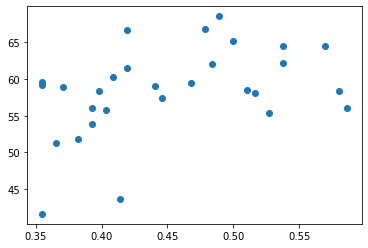

In [242]:
plt.scatter(x=scatter['SH.MMR.LEVE.AL'], y=scatter['SH.FPL.SATI.ZS']);

In [ ]:

sm = SARIMAX(exog=features)

Sources
1. https://www.statsmodels.org/stable/examples/notebooks/generated/autoregressions.html